In [127]:
import kaleido
import pandas as pd
import numpy as np
import plotly.graph_objects as go
######## Search space #########
import sys
sys.path.append("../")
from search_space.RegNet import RegNet
from search_space.utils import create_widths_plot, scatter_results
# Initialize an empty list to store dictionaries
def results_to_df(path, name):
    data = []
    # Open the text file
    with open(path, 'r') as file:
        lines = file.readlines()
        # Initialize an empty dictionary to store data for each block
        block_data = {}
        for line in lines:
            # If the line contains dashes, it indicates the end of a block
            if '-------------------------' in line:
                # If block_data is not empty, add it to the list of data dictionaries
                if block_data:
                    data.append(block_data)
                    # Reset block_data for the next block
                    block_data = {}
            elif 'best_acc' in line:
                continue
            else:
                # Split the line by ':'
                #print(line)
                key, value = line.strip().split(': ')
                # Store the key-value pair in the block_data dictionary
                block_data[key] = value

    # Create a DataFrame from the list of dictionaries
    df = pd.DataFrame(data)

    # Convert columns to appropriate data types if needed
    df['epoch'] = df['epoch'].astype(int)
    df['lr'] = df['lr'].astype(float)
    df['train_acc'] = df['train_acc'].astype(float)
    df['train_loss'] = df['train_loss'].astype(float)
    df['test_acc'] = df['test_acc'].astype(float)
    df['test_acc_top5'] = df['test_acc_top5'].astype(float)
    df['test_loss'] = df['test_loss'].astype(float)
    df['epoch_time'] = df['epoch_time'].astype(float)
    df=df.assign(name=name)
    
    return df

In [128]:
import json
import os

def get_predictor_data(studies):
    train_data=[]
    for study_name in studies: 
        data=[]
        study_folder=f"/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/classifier_train/{study_name}"
        subjects= os.listdir(study_folder)

        subjects=[subject for subject in subjects if os.path.isdir(f"{study_folder}/{subject}")]
        print(subjects)
        for name in subjects:
            try:
                test_acc=results_to_df(f"{study_folder}/{name}/worklog.txt", f"{name}")[["epoch","test_acc","name"]]
                #test_acc=test_acc.rename(columns={"test_acc":"acc","test_loss":"test_acc"})
                #print(test_acc.columns)
                if len(test_acc)>49:
                    test_acc_piv = test_acc[["epoch","test_acc","name"]].pivot(index='name', columns='epoch', values='test_acc').add_prefix("epoch_").reset_index()
                    #test_acc_piv["best_acc"]=test_acc["acc"].max()
                    data.append(test_acc_piv)
            except:
                pass
        data=pd.concat(data)
        train_data.append(data)
    train_data=pd.concat(train_data)
    return train_data

In [129]:
corr_scores={}
accuracies={}
test_accuracies={}
epochs_results={}

In [130]:
import pandas as pd
from itertools import combinations

train_data=get_predictor_data(studies=["Sadie"]).sort_values("name").set_index("name")


['complex_anaconda', 'tunneling_shrimp', 'orange_dogfish', 'gainful_muskox', 'grumpy_goat', 'frisky_flamingo', 'attractive_galago', 'jade_cow', 'turquoise_pogona', 'classic_rottweiler', 'smoky_lion', 'romantic_mamba', 'pretty_leech', 'acrid_mule', 'beryl_dugong', 'brass_jackrabbit', 'amigurumi_smilodon', 'sweet_sawfly', 'sandy_albatross', 'unyielding_tamarin', 'bizarre_owl', 'congenial_wildebeest', 'origami_cuckoo', 'ebony_bulldog', 'mega_cuckoo', 'accomplished_angelfish', 'giga_basilisk', 'radiant_seriema', 'arcane_aardwark', 'true_viper', 'quantum_moth', 'ginger_skunk', 'friendly_whale', 'teal_mouse', 'imperial_hyrax', 'auburn_dingo', 'fast_nautilus', 'aspiring_slug', 'magnificent_foxhound', 'juicy_cuscus', 'stoic_lobster', 'notorious_agouti', 'attentive_chital', 'brawny_partridge', 'graceful_muskox', 'calm_kudu', 'lively_grebe', 'accelerated_pelican', 'beautiful_bobcat', 'maize_pug', 'crimson_caiman', 'helpful_groundhog', 'bright_labradoodle', 'finicky_horse', 'agile_grouse', 'horne

In [131]:
train_data
#train_data_cum= train_data.iloc[:,:-1].cummin(axis=1)
#train_data_cum["best_acc"]=train_data["best_acc"]

epoch,epoch_1,epoch_2,epoch_3,epoch_4,epoch_5,epoch_6,epoch_7,epoch_8,epoch_9,epoch_10,...,epoch_41,epoch_42,epoch_43,epoch_44,epoch_45,epoch_46,epoch_47,epoch_48,epoch_49,epoch_50
name,,,,,,,,,,,,,,,,,,,,,
abiding_pony,65.92,70.44,71.43,78.91,76.74,82.24,81.99,86.01,84.54,86.97,...,94.88,95.26,95.01,95.64,95.07,95.04,94.52,95.24,95.73,95.53
accelerated_pelican,55.26,62.46,60.39,72.53,68.51,70.40,77.17,69.98,75.61,81.24,...,92.67,93.81,91.84,93.83,92.00,93.78,94.14,93.90,93.35,93.49
accomplished_angelfish,59.48,67.36,74.38,69.93,81.22,77.37,82.87,84.17,82.25,84.56,...,94.30,93.77,94.18,94.55,94.17,94.00,94.33,94.33,94.82,94.15
accurate_dragon,58.98,68.46,65.43,78.41,77.47,78.12,71.50,84.35,80.44,78.27,...,93.84,94.74,94.34,94.74,94.97,94.79,94.54,93.72,94.99,94.13
acrid_mule,58.04,63.71,76.98,71.83,72.83,82.73,82.88,84.59,85.45,83.79,...,94.13,94.33,94.39,94.70,94.47,94.80,94.73,94.87,94.79,94.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
teal_mouse,60.10,68.87,73.94,81.82,81.90,84.62,80.98,84.45,85.75,86.43,...,94.17,94.76,93.83,94.70,95.28,93.97,94.68,93.77,94.41,94.64
true_viper,57.73,70.37,71.03,73.63,76.99,78.99,80.15,84.97,82.32,77.04,...,92.97,93.11,93.81,93.58,93.43,93.19,93.96,93.77,93.31,93.10
tunneling_shrimp,62.19,73.41,74.25,72.50,76.84,85.86,84.17,81.56,88.05,81.70,...,94.25,95.05,95.31,95.00,95.54,95.20,95.00,95.37,95.12,95.06


In [132]:
train_data_cum= train_data.cummax(axis=1)
train_data_cum["best_acc"]=train_data_cum.max(axis=1)
train_data["best_acc"]=train_data.max(axis=1)

In [133]:
train_data

epoch,epoch_1,epoch_2,epoch_3,epoch_4,epoch_5,epoch_6,epoch_7,epoch_8,epoch_9,epoch_10,...,epoch_42,epoch_43,epoch_44,epoch_45,epoch_46,epoch_47,epoch_48,epoch_49,epoch_50,best_acc
name,,,,,,,,,,,,,,,,,,,,,
abiding_pony,65.92,70.44,71.43,78.91,76.74,82.24,81.99,86.01,84.54,86.97,...,95.26,95.01,95.64,95.07,95.04,94.52,95.24,95.73,95.53,95.73
accelerated_pelican,55.26,62.46,60.39,72.53,68.51,70.40,77.17,69.98,75.61,81.24,...,93.81,91.84,93.83,92.00,93.78,94.14,93.90,93.35,93.49,94.14
accomplished_angelfish,59.48,67.36,74.38,69.93,81.22,77.37,82.87,84.17,82.25,84.56,...,93.77,94.18,94.55,94.17,94.00,94.33,94.33,94.82,94.15,94.82
accurate_dragon,58.98,68.46,65.43,78.41,77.47,78.12,71.50,84.35,80.44,78.27,...,94.74,94.34,94.74,94.97,94.79,94.54,93.72,94.99,94.13,94.99
acrid_mule,58.04,63.71,76.98,71.83,72.83,82.73,82.88,84.59,85.45,83.79,...,94.33,94.39,94.70,94.47,94.80,94.73,94.87,94.79,94.51,94.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
teal_mouse,60.10,68.87,73.94,81.82,81.90,84.62,80.98,84.45,85.75,86.43,...,94.76,93.83,94.70,95.28,93.97,94.68,93.77,94.41,94.64,95.28
true_viper,57.73,70.37,71.03,73.63,76.99,78.99,80.15,84.97,82.32,77.04,...,93.11,93.81,93.58,93.43,93.19,93.96,93.77,93.31,93.10,93.98
tunneling_shrimp,62.19,73.41,74.25,72.50,76.84,85.86,84.17,81.56,88.05,81.70,...,95.05,95.31,95.00,95.54,95.20,95.00,95.37,95.12,95.06,95.54


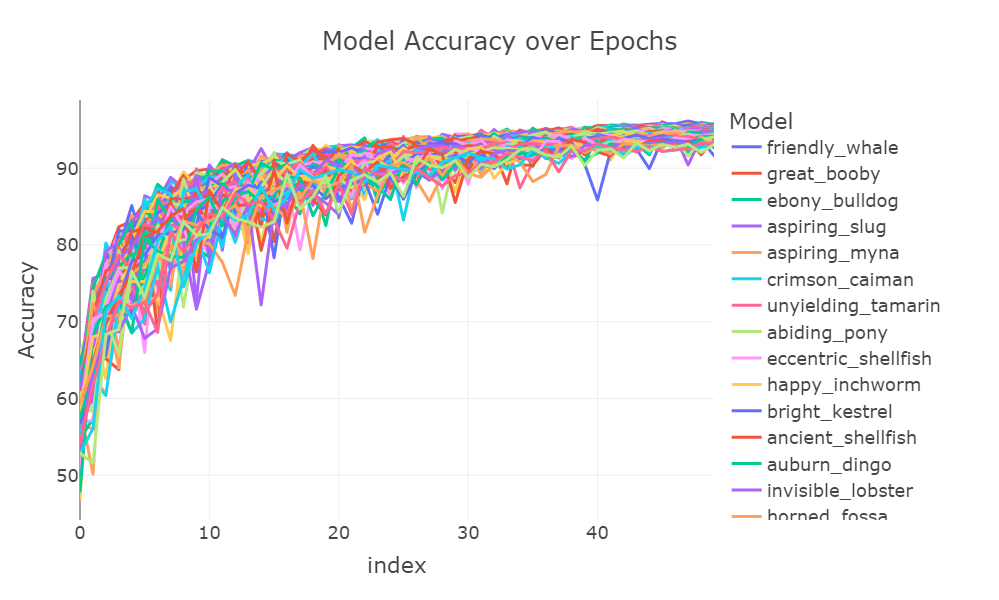

In [134]:
epochs_data=train_data.sort_values("best_acc",ascending= False).iloc[:,:-1].T.reset_index(drop=True).reset_index().melt(id_vars='index', var_name='Model', value_name='Accuracy')

import plotly.express as px
fig = px.line(epochs_data, x='index', y='Accuracy', color='Model', title='Model Accuracy over Epochs')
fig.update_layout(height=600, width=800, template="presentation")
fig

In [135]:
from sklearn.preprocessing import MinMaxScaler

def weighted_moving_slope(series, window=8):
    slopes = []
    weights = np.array([1, 2, 3, 4,5,6,7,8])  # Weights for epochs, adjust as needed

    for i in range(len(series)):
        if i < window - 1:
            slopes.append(np.nan)
            continue

        y = series[i - window + 1: i + 1]
        x = np.arange(1, window + 1)

        # Apply weights
        W = np.diag(weights)
        X = np.vstack([x, np.ones(len(x))]).T

        # Compute the weighted least squares regression
        beta = np.linalg.inv(X.T @ W @ X) @ (X.T @ W @ y)
        slope = beta[0]

        slopes.append(slope)

    return slopes

# Apply the weighted moving slope calculation across each row
slope_df = train_data_cum.apply(weighted_moving_slope, axis=1, result_type='expand')

# Add '_slope' to the column names to distinguish them
slope_df.columns = [f'epoch_{i+1}_slope' for i in range(slope_df.shape[1])]

slope_df_scaled = pd.DataFrame(index=slope_df.index)
# Initialize the MinMaxScaler
scaler = MinMaxScaler()
# Apply the scaler to each column independently
for column in slope_df.columns:
    slope_df_scaled[column] = scaler.fit_transform(slope_df[[column]])
    
##########################
# Initialize the MinMaxScaler
scaler = MinMaxScaler()
# Apply the scaler to each column independently
for column in train_data_cum.columns:
    train_data_cum[column] = scaler.fit_transform(train_data_cum[[column]])

##########################
# Initialize the MinMaxScaler
scaler = MinMaxScaler()
# Apply the scaler to each column independently
for column in train_data.columns:
    train_data[column] = scaler.fit_transform(train_data[[column]])
    
    


/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/_array_api.py:472: RuntimeWarning:

All-NaN slice encountered

/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/_array_api.py:489: RuntimeWarning:

All-NaN slice encountered

/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/_array_api.py:472: RuntimeWarning:

All-NaN slice encountered

/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/_array_api.py:489: RuntimeWarning:

All-NaN slice encountered

/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/_array_api.py:472: RuntimeWarning:

All-NaN slice encountered

/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/_array_api.py:489: RuntimeWarning:

All-NaN slice encountered

/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/sklearn/utils/_array_api.py:472: RuntimeWarning:

All-NaN slice encountered

/home/hpc/iwb3/iwb3021h/.local/lib/python

In [136]:
train_data_cum=train_data_cum.reset_index()

In [137]:
train_data=train_data.reset_index()

In [138]:
#slope_df_scaled=slope_df.copy()
slope_df_scaled=slope_df_scaled.reset_index()
slope_df_scaled=slope_df_scaled.fillna(0)

In [139]:
#train_data_cum=pd.merge(train_data_cum, slope_df, on="name")
#train_data_cum=train_data_cum.fillna(0)

In [140]:
total_data=[]


pairs = list(combinations(train_data_cum.index, 2))
combined_data = []

for idx1, idx2 in pairs:
    row1 = train_data_cum.loc[idx1]
    row2 = train_data_cum.loc[idx2]
    

    combined_row = {
        'name_A': row1['name'],
        'name_B': row2['name'],
        'best_acc_A': row1['best_acc'],
        'best_acc_B': row2['best_acc'],
        'label': 1 if row1['best_acc'] > row2['best_acc'] else 0
        
    }
    # Create the epochs_row dictionary
    epochs_rows = {
        f'epoch_{epoch}_A': row1[f'epoch_{epoch}'] for epoch in range(1, 51)
    }
    epochs_rows.update({
        f'epoch_{epoch}_B': row2[f'epoch_{epoch}'] for epoch in range(1, 51)
    })
    ##############################################################
    row1_s=slope_df_scaled.loc[idx1]
    row2_s=slope_df_scaled.loc[idx2]
    slope_rows= {
        f'slope_{epoch}_A': row1_s[f'epoch_{epoch}_slope'] for epoch in range(1, 51)
    }
    slope_rows.update({
        f'slope_{epoch}_B': row2_s[f'epoch_{epoch}_slope'] for epoch in range(1, 51)
    })
    combined_row.update(slope_rows)
    #######################
    
    # Update combined_row with epochs_rows
    combined_row.update(epochs_rows)

    combined_data.append(combined_row)

combined_df = pd.DataFrame(combined_data)



In [141]:
X_test_new=combined_df.drop(columns=['label'])
y_test_new=combined_df["label"]

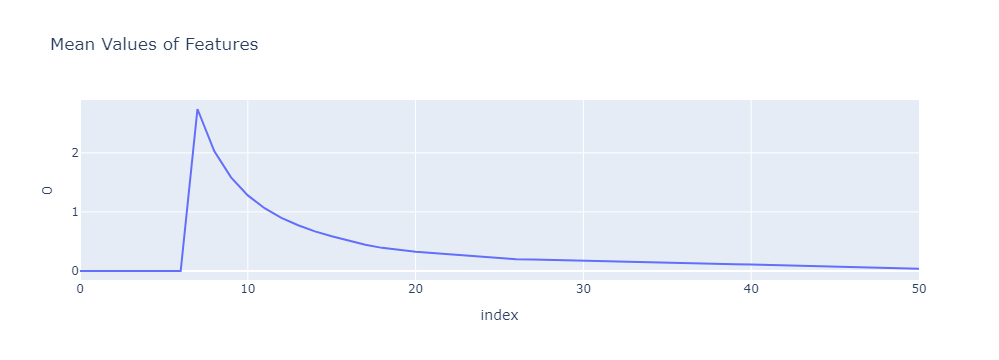

In [142]:
plot_slope_df=slope_df.mean().fillna(0).reset_index(drop=True).reset_index()
fig = px.line(plot_slope_df, x='index', y=0, 
              title='Mean Values of Features')
fig

In [143]:
plot_slope_df[0].quantile(0.90)

0.8990956416464843

In [144]:
plot_slope_df["w"]=plot_slope_df[0]/plot_slope_df[0].quantile(0.98)
w=list(plot_slope_df["w"].values)

In [145]:
w

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.3510118898624552,
 1.0,
 0.7805925427263036,
 0.6305126281699647,
 0.5234396481572522,
 0.4429564747491267,
 0.38173411107953964,
 0.3300531816013782,
 0.2893485497381846,
 0.2527407442163562,
 0.2186549343336727,
 0.1929900251444026,
 0.17402426006715305,
 0.16090550876614318,
 0.14976359645922058,
 0.1405438484281583,
 0.12932221044119752,
 0.11607840314830688,
 0.10715807375599352,
 0.09835902282957378,
 0.09682276265585146,
 0.093242662106063,
 0.08939296549110391,
 0.08615522808602101,
 0.08293717357950266,
 0.07837431982164908,
 0.0733750624037327,
 0.07066259992798378,
 0.06818215707469669,
 0.0659450664218257,
 0.06329622543638577,
 0.06142893469591469,
 0.0570438234766049,
 0.05466278920191882,
 0.05138628245118015,
 0.04666019980726268,
 0.042039689073821086,
 0.03718119420320239,
 0.03473355618085353,
 0.03139720546579788,
 0.02830460458547512,
 0.025842254093490592,
 0.02359144505677414,
 0.019072728707820102]

In [146]:

epoch=20
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_0=np.repeat(0,len(y_test_new))
y_0= ((X_test_new[f'epoch_{epoch}_A']+X_test_new[f'slope_{epoch}_A']*w[epoch]) > (X_test_new[f'epoch_{epoch}_B']+X_test_new[f'slope_{epoch}_B']*w[epoch])).astype(int).values
# Calculate accuracy
y_0_accuracy = accuracy_score(y_test_new, y_0)
print(f"Accuracy: {y_0_accuracy}")


Accuracy: 0.7525713457916847


In [147]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_0=np.repeat(0,len(y_test_new))
y_0= (X_test_new[f'epoch_{epoch}_A'] > X_test_new[f'epoch_{epoch}_B']).astype(int).values
# Calculate accuracy
y_0_accuracy = accuracy_score(y_test_new, y_0)
print(f"Accuracy: {y_0_accuracy}")

Accuracy: 0.7732869766768072


In [148]:
from scipy.stats import spearmanr
from scipy.stats import kendalltau

def kendall_tau_distance(list1, list2):
    tau, _ = kendalltau(list1, list2)
    return tau
def spearman_rank_correlation(list1, list2):
    corr, _ = spearmanr(list1, list2)
    return corr
def get_correlations_epochs(combined_df):  
    accs={}
    accs_slope={}
    corrs={}
    corrs_slope={}
    results={}
    X_test_new=combined_df
    y_test_new=combined_df["label"]
    for epoch in range(1,51):
        #############################
        if epoch>8:
            y_pred_slope= ((X_test_new[f'epoch_{epoch}_A']+X_test_new[f'slope_{epoch}_A']*w[epoch]) >= (X_test_new[f'epoch_{epoch}_B']+X_test_new[f'slope_{epoch}_B']*w[epoch])).astype(int).values
        else:
            y_pred_slope= (X_test_new[f'epoch_{epoch}_A'] >= X_test_new[f'epoch_{epoch}_B']).astype(int).values
        
        accuracy_slope = accuracy_score(y_test_new, y_pred_slope)
        accs_slope[epoch]=accuracy_slope
        ############################
        y_epoch_10_pred= (X_test_new[f'epoch_{epoch}_A'] >= X_test_new[f'epoch_{epoch}_B']).astype(int).values

        accuracy = accuracy_score(y_test_new, y_epoch_10_pred)
        accs[epoch]=accuracy
        
        ranking_test_df=X_test_new[["name_A","name_B", "label"]]
        ranking_test_df["pred_10_epochs"]=y_epoch_10_pred
        #####################
        ranking_test_df["pred_slope"]=y_pred_slope
        ################################
        # Create a new column by applying the function to each row
        ranking_target={}
        ranking_10={}
        ranking_slope={}
        
        for ind in list(ranking_test_df.name_A.unique())+list(ranking_test_df.name_B.unique()):
            ranking_target[ind]=0
            ranking_10[ind]=0
            ranking_slope[ind]=0
            
        for index, row in ranking_test_df.iterrows():
            if row["label"]==1:
                ranking_target[row["name_A"]]=ranking_target[row["name_A"]]+1
            else:
                ranking_target[row["name_B"]]=ranking_target[row["name_B"]]+1

            if row["pred_10_epochs"]==1:
                ranking_10[row["name_A"]]=ranking_10[row["name_A"]]+1
            else:
                ranking_10[row["name_B"]]=ranking_10[row["name_B"]]+1

            if row["pred_slope"]==1:
                ranking_slope[row["name_A"]]=ranking_slope[row["name_A"]]+1
            else:
                ranking_slope[row["name_B"]]=ranking_slope[row["name_B"]]+1

        ranking_target_df=pd.DataFrame([ranking_target]).T.rename(columns={0:"score"}).sort_values(by="score", ascending=False)
        ranking_10_df=pd.DataFrame([ranking_10]).T.rename(columns={0:"score"}).sort_values(by="score", ascending=False)

        ranking_slope_df=pd.DataFrame([ranking_slope]).T.rename(columns={0:"score"}).sort_values(by="score", ascending=False)

            
        ######## Correlation #########
        # Example usage
        target =ranking_target_df.index.tolist()
        list_to_compare_10 = ranking_10_df.index.tolist()
        # Convert the lists to ranks
        target_ranks = {k: i for i, k in enumerate(target)}
        list_to_compare_ranks_10 = [target_ranks[x] for x in list_to_compare_10]
        
        #####################################
        list_to_compare_slope = ranking_slope_df.index.tolist()
        list_to_compare_ranks_slope = [target_ranks[x] for x in list_to_compare_slope]
        spearman_corr_slope = spearman_rank_correlation(list_to_compare_ranks_slope, list(range(len(target))))
        corrs_slope[epoch]=spearman_corr_slope
        
        # Calculate Spearman rank correlation
        spearman_corr_10 = spearman_rank_correlation(list_to_compare_ranks_10, list(range(len(target))))
        print(f'Spearman rank correlation: {spearman_corr_10}')
        # Calculate Kendall Tau distance
        tau_distance_10 = kendall_tau_distance(list_to_compare_ranks_10, list(range(len(target))))
        print(f'Kendall Tau distance: {tau_distance_10}')
        corrs[epoch]=spearman_corr_10

    
    results["accuracy"]=accs
    results["correlation"]=corrs
    results["accuracy_slope"]=accs_slope
    results["correlation_slope"]=corrs_slope
    return results


In [149]:
corr_epochs=get_correlations_epochs(combined_df)

/tmp/ipykernel_1771134/907740561.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1771134/907740561.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.2943367699100501
Kendall Tau distance: 0.200927133130523


/tmp/ipykernel_1771134/907740561.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1771134/907740561.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.40574613156866396
Kendall Tau distance: 0.29421990438939594


/tmp/ipykernel_1771134/907740561.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1771134/907740561.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.4728707649943942
Kendall Tau distance: 0.3301463131971607


/tmp/ipykernel_1771134/907740561.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1771134/907740561.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.5325233091932993
Kendall Tau distance: 0.3964942778502101


/tmp/ipykernel_1771134/907740561.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1771134/907740561.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.6553270591156932
Kendall Tau distance: 0.476749239461104


/tmp/ipykernel_1771134/907740561.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1771134/907740561.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.5850324484422192
Kendall Tau distance: 0.41387802404751567


/tmp/ipykernel_1771134/907740561.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1771134/907740561.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.6244745616629964
Kendall Tau distance: 0.44574822540924247


/tmp/ipykernel_1771134/907740561.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1771134/907740561.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.614876980779274
Kendall Tau distance: 0.43300014486455174


/tmp/ipykernel_1771134/907740561.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1771134/907740561.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.6126638399818859
Kendall Tau distance: 0.4370563523105896


/tmp/ipykernel_1771134/907740561.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1771134/907740561.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.6410037287405184
Kendall Tau distance: 0.46342170070983635


/tmp/ipykernel_1771134/907740561.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1771134/907740561.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.6302374926502544
Kendall Tau distance: 0.45646820223091417


/tmp/ipykernel_1771134/907740561.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1771134/907740561.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.5649242747946637
Kendall Tau distance: 0.40141967260611333


/tmp/ipykernel_1771134/907740561.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1771134/907740561.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.6212315434648437
Kendall Tau distance: 0.4483557873388382


/tmp/ipykernel_1771134/907740561.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1771134/907740561.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.6787951164820557
Kendall Tau distance: 0.49326379834854417


/tmp/ipykernel_1771134/907740561.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1771134/907740561.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.6727765421683667
Kendall Tau distance: 0.48949732000579466


/tmp/ipykernel_1771134/907740561.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1771134/907740561.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.6593808318633843
Kendall Tau distance: 0.4816746342170071


/tmp/ipykernel_1771134/907740561.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1771134/907740561.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.6408138222694555
Kendall Tau distance: 0.4642908880197016


/tmp/ipykernel_1771134/907740561.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1771134/907740561.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.6352407977532604
Kendall Tau distance: 0.452991452991453


/tmp/ipykernel_1771134/907740561.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1771134/907740561.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.6938196399811555
Kendall Tau distance: 0.5007967550340432


/tmp/ipykernel_1771134/907740561.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1771134/907740561.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.7412524331766606
Kendall Tau distance: 0.5448355787338839


/tmp/ipykernel_1771134/907740561.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1771134/907740561.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.7424503047633656
Kendall Tau distance: 0.5555555555555557


/tmp/ipykernel_1771134/907740561.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1771134/907740561.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.7599436123862844
Kendall Tau distance: 0.5616398667246125


/tmp/ipykernel_1771134/907740561.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1771134/907740561.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.749206592676184
Kendall Tau distance: 0.5526582645226713


/tmp/ipykernel_1771134/907740561.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1771134/907740561.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.7717835504475584
Kendall Tau distance: 0.5798928002317834


/tmp/ipykernel_1771134/907740561.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1771134/907740561.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.7717908545425993
Kendall Tau distance: 0.5842387367811097


/tmp/ipykernel_1771134/907740561.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1771134/907740561.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.772762299183037
Kendall Tau distance: 0.5882949442271477


/tmp/ipykernel_1771134/907740561.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1771134/907740561.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.7490239903001619
Kendall Tau distance: 0.5607706794147472


/tmp/ipykernel_1771134/907740561.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1771134/907740561.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.7468108495027738
Kendall Tau distance: 0.5581631174851515


/tmp/ipykernel_1771134/907740561.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1771134/907740561.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.7941194730825838
Kendall Tau distance: 0.6065478777343185


/tmp/ipykernel_1771134/907740561.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1771134/907740561.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.809304686672583
Kendall Tau distance: 0.622482978415182


/tmp/ipykernel_1771134/907740561.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1771134/907740561.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.8444008633440339
Kendall Tau distance: 0.6563812834999276


/tmp/ipykernel_1771134/907740561.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1771134/907740561.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.8472567645050199
Kendall Tau distance: 0.6642039692887152


/tmp/ipykernel_1771134/907740561.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1771134/907740561.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.8627998787520224
Kendall Tau distance: 0.6914385049978271


/tmp/ipykernel_1771134/907740561.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1771134/907740561.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.8521432040873717
Kendall Tau distance: 0.6792698826597132


/tmp/ipykernel_1771134/907740561.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1771134/907740561.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.8556637778970779
Kendall Tau distance: 0.6784006953498479


/tmp/ipykernel_1771134/907740561.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1771134/907740561.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.8606305625248796
Kendall Tau distance: 0.6850644647254818


/tmp/ipykernel_1771134/907740561.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1771134/907740561.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.8545097308806182
Kendall Tau distance: 0.6772417789366942


/tmp/ipykernel_1771134/907740561.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1771134/907740561.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.8694977339045136
Kendall Tau distance: 0.6946255251339998


/tmp/ipykernel_1771134/907740561.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1771134/907740561.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.8995613890927949
Kendall Tau distance: 0.7317108503549182


/tmp/ipykernel_1771134/907740561.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1771134/907740561.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9039511502123666
Kendall Tau distance: 0.7279443720121687


/tmp/ipykernel_1771134/907740561.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1771134/907740561.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9033376062289323
Kendall Tau distance: 0.7285238302187456


/tmp/ipykernel_1771134/907740561.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1771134/907740561.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.906149682819673
Kendall Tau distance: 0.7372157033173983


/tmp/ipykernel_1771134/907740561.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1771134/907740561.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9098893794806059
Kendall Tau distance: 0.7418513689700131


/tmp/ipykernel_1771134/907740561.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1771134/907740561.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.924015499289677
Kendall Tau distance: 0.7682167173692598


/tmp/ipykernel_1771134/907740561.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1771134/907740561.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9319039219338322
Kendall Tau distance: 0.7905258583224686


/tmp/ipykernel_1771134/907740561.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1771134/907740561.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9584835237876117
Kendall Tau distance: 0.845284658843981


/tmp/ipykernel_1771134/907740561.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1771134/907740561.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9584543074074482
Kendall Tau distance: 0.8533970737360569


/tmp/ipykernel_1771134/907740561.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1771134/907740561.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9739389888941234
Kendall Tau distance: 0.9029407503983776


/tmp/ipykernel_1771134/907740561.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1771134/907740561.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9905338928270134
Kendall Tau distance: 0.9521946979574099


/tmp/ipykernel_1771134/907740561.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1771134/907740561.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Spearman rank correlation: 0.9996567075330784
Kendall Tau distance: 0.98899029407504


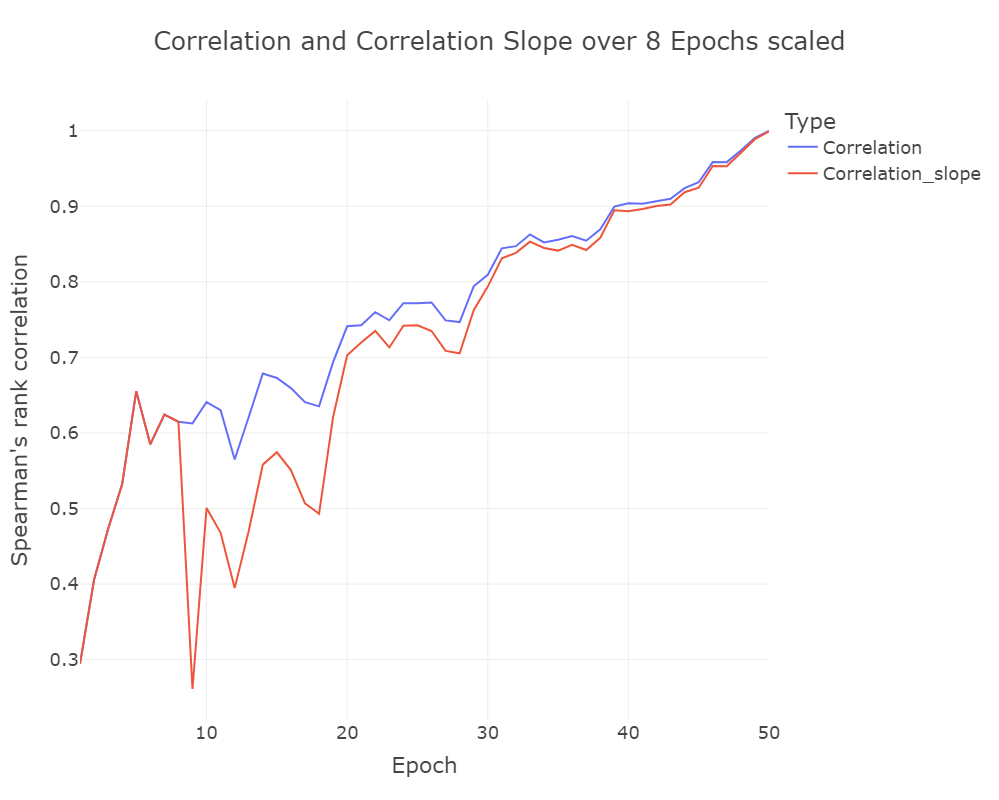

In [150]:
df = pd.DataFrame(list(corr_epochs["correlation"].items()), columns=['Epoch', 'Correlation'])
df_slope = pd.DataFrame(list(corr_epochs["correlation_slope"].items()), columns=['Epoch', 'Correlation_slope'])
df=pd.merge(df, df_slope, on="Epoch")
# Create the line plot using Plotly
df_melted = df.melt(id_vars='Epoch', value_vars=['Correlation', 'Correlation_slope'], 
                    var_name='Type', value_name='Value')

# Plot the data
fig = px.line(df_melted, x='Epoch', y='Value', color='Type', 
              title='Correlation and Correlation Slope over 8 Epochs scaled')
fig.update_traces(line=dict(width=2)) 
fig.update_layout(width=1000, height=800, template="presentation",
                 yaxis_title="Spearman's rank correlation")
fig